<a href="https://colab.research.google.com/github/farima-trb/MMU-Courseworks/blob/main/Copy_of_ML_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Arial" size=5 color='#8496b3'> Installing Packages
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <font face="Arial" size=5 color='#8496b3'> Loading Dataset
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


# <font face="Arial" size=5 color='#8496b3'> 1. Data/Domain Understanding and Exploration
<font face="Arial" size=3 color='#8496b3'> <font>

# <font face="Arial" size=4 color='#8496b3'> 1.1. Meaning and Type of Features; Analysis of Distributions (3-4)
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
# feature's missing values number
print("number of missing values in the features:\n")
print("fuel type: ",df.loc[df["fuel_type"].isnull()].shape)

number of missing values in the features:

fuel type:  (601, 12)


In [ ]:
df["fuel_type"]. value_counts()

,count
fuel_type,
Petrol,216929
Diesel,158120
Petrol Hybrid,13602
Petrol Plug-in Hybrid,6160
Electric,4783
Diesel Hybrid,1403
Bi Fuel,221
Diesel Plug-in Hybrid,185
Natural Gas,1


In [ ]:
# shows these to samples have same records
df.loc[df["vehicle_condition"]=="NEW"].equals(df.loc[(df["vehicle_condition"]=="NEW") & (df["year_of_registration"].isnull())])

True

# <font face="Arial" size=3 color='#a9b5ca'> 1.1.1. Distribution of mileage <font face="Arial" size=3 color='#9f647a'>


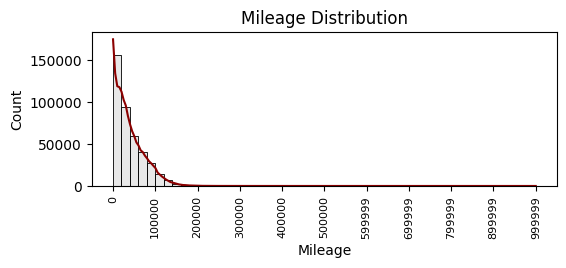

In [ ]:
# Distribution of mileage
plt.figure(figsize=(6, 2))

# Plot the histogram
ax = sns.histplot(df['mileage'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

# Define xticks based on the bins
min_mileage = df['mileage'].min()
max_mileage = df['mileage'].max()

bin_width = (max_mileage - min_mileage) / 10
xticks = np.arange(min_mileage, max_mileage + bin_width, bin_width)

plt.xticks(xticks, fontsize=8, rotation=90)
plt.title('Mileage Distribution', fontsize=12)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.show()

# <font face="Arial" size=3 color='#a9b5ca'> 1.1.2. Distribution of fuel type <font face="Arial" size=3 color='#9f647a'>

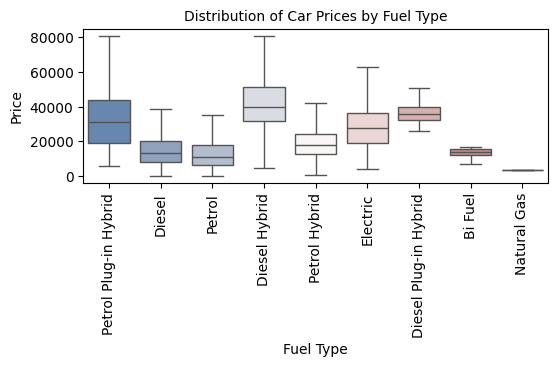

In [ ]:
# Distribution of price across fuel_type

plt.figure(figsize=(6, 2))
sns.boxplot(data=df, x='fuel_type', y='price', showfliers=False, hue='fuel_type', legend=False, palette='vlag')
plt.title('Distribution of Car Prices by Fuel Type', fontsize=10)
plt.xlabel('Fuel Type', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.xticks(rotation=90)

plt.show()

# <font face="Arial" size=3 color='#a9b5ca'> 1.1.3. Distribution of year of registration <font face="Arial" size=3 color='#9f647a'>

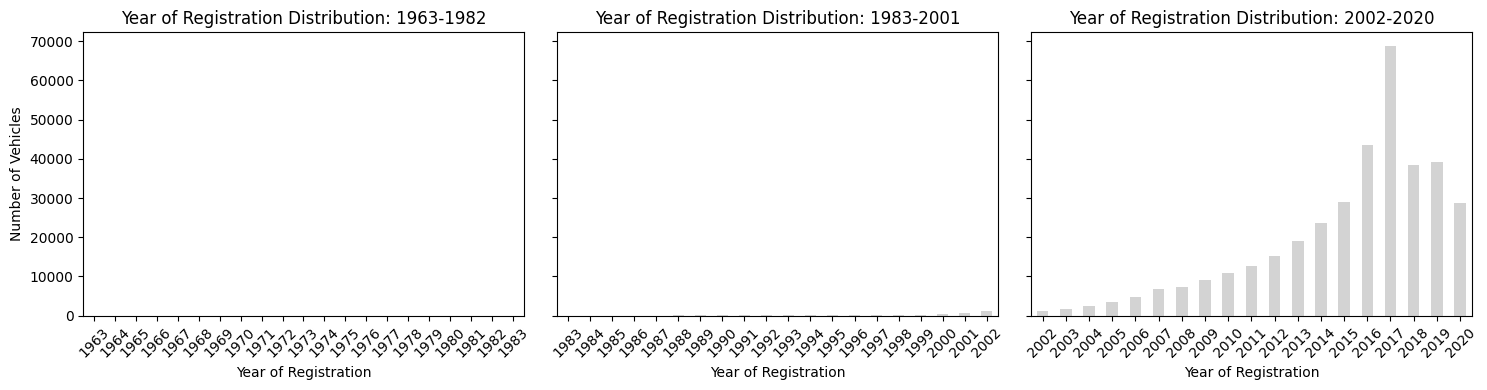

In [ ]:
# Prepare data subsets for year_of_registration distribution in each time frame
year_distribution_data = {}
time_frames = {
    "1963-1982": (1963, 1983),
    "1983-2001": (1983, 2002),
    "2002-2020": (2002, 2021),
}


for frame, (start, end) in time_frames.items():
    subset = df[(df['year_of_registration'] >= start) & (df['year_of_registration'] <= end)]
    year_distribution_data[frame] = subset['year_of_registration'].value_counts().sort_index()

# Create a single row with 3 subplots for year_of_registration distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, (frame, year_distribution) in zip(axes, year_distribution_data.items()):
    year_distribution.plot(kind='bar', ax=ax, color='lightgrey')
    ax.set_title(f"Year of Registration Distribution: {frame}")
    ax.set_xlabel("Year of Registration")
    ax.set_ylabel("Number of Vehicles")
    ax.set_xticks(range(len(year_distribution)))
    ax.set_xticklabels(year_distribution.index.astype(int), rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# In section 2.1 the plot after applying the data preprocessing procedures is drawn
# year 2021 is highlighted there

# <font face="Arial" size=4 color='#8496b3'> 1.2. Analysis of Predictive Power Features (2-3)
<font face="Arial" size=3 color='#8496b3'> <font>

# <font face="Arial" size=3 color='#a9b5ca'> 1.2.1 Correlation matrix for numerical features
<font>

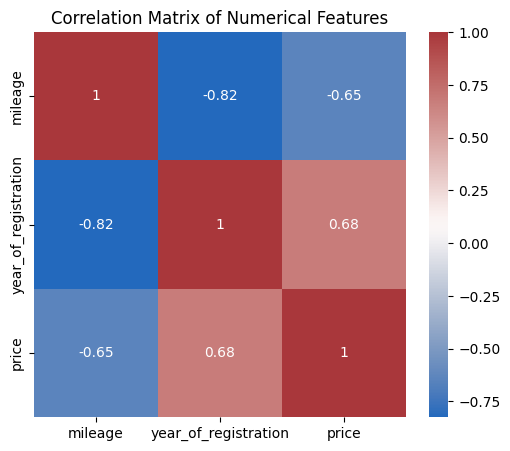

In [ ]:
# Correlation matrix for numerical features
numerical_features = ['mileage', 'year_of_registration', 'price']
correlation_matrix = df[numerical_features].corr(method='spearman')

# Heatmap to visualize correlations
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# <font face="Arial" size=3 color='#a9b5ca'> 1.2.2 Price vs. Mileage
<font>

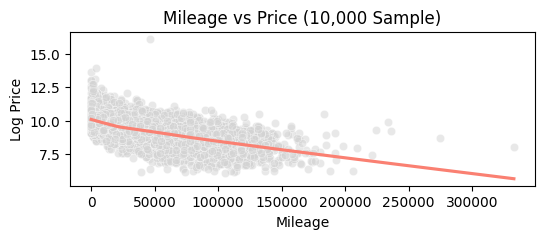

In [ ]:
# Take a sample of 10,000 points
sample_df = df.sample(10000, random_state=42)

plt.figure(figsize=(6, 2))

# Scatter plot for sampled data
sns.scatterplot(data=sample_df, x='mileage', y=np.log1p(sample_df['price']), alpha=0.5, color='lightgrey')

# Regression line
sns.regplot(
    data=sample_df,
    x='mileage',
    y=np.log1p(sample_df['price']),
    scatter=False,
    color='salmon',
    lowess=True
)

plt.title('Mileage vs Price (10,000 Sample)', fontsize=12)
plt.xlabel('Mileage', fontsize=10)
plt.ylabel('Log Price', fontsize=10)
plt.show()

# <font face="Arial" size=3 color='#a9b5ca'> 1.2.3 Price vs. Standard Make
<font>

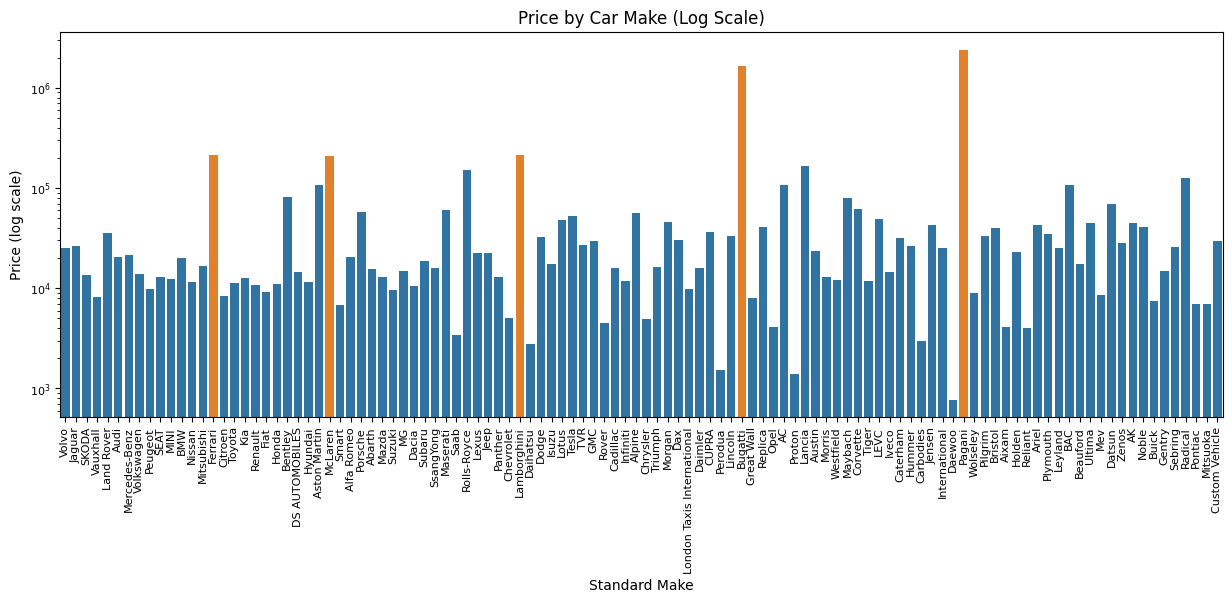

In [ ]:
plt.figure(figsize=(15,5))
bar_colors = ['lightgrey' if (x != "Pagani") & (x != "Bugatti") & (x != "Lamborghini") & (x != "Ferrari") & (x != "McLaren")
         else 'salmon' for x in df['standard_make']]
sns.barplot(x=df.standard_make, y=df.price, errorbar= None, hue= bar_colors, legend= False)
sns.color_palette("vlag", as_cmap=True)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Standard Make', fontsize=10)
plt.yticks(fontsize=8)
plt.ylabel('Price (log scale)', fontsize=10)
plt.yscale('log')

plt.title('Price by Car Make (Log Scale)', fontsize=12)
plt.show()

# <font face="Arial" size=4 color='#8496b3'> 1.3. Data Processing for Data Exploration and Visualisation (2-3)
<font face="Arial" size=3 color='#8496b3'> <font>

# <font face="Arial" size=3 color='#a9b5ca'> 1.3.1. Data Filtering for Data Exploration <font face="Arial" size=3 color='#9f647a'>

In [ ]:
df['body_type'].unique()

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', nan, 'Pickup', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

In [ ]:
df.groupby('body_type')['price'].mean().sort_values(ascending=False).head(5)

,price
body_type,
Limousine,58953.911950
Coupe,35709.213561
Camper,33197.584416
Convertible,27015.137424
SUV,22477.751450


In [ ]:
df.loc[df['body_type']=='Limousine'].sort_values(by='price', ascending=False).head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
375245,202010034545402,103.0,70,Green,Rolls-Royce,Phantom,USED,2020.0,374950,Limousine,False,Petrol
263331,202010215256903,1450.0,18,Purple,Rolls-Royce,Phantom,USED,2018.0,350000,Limousine,False,Petrol
261253,202009234081068,19.0,20,Blue,Rolls-Royce,Phantom,USED,2020.0,345000,Limousine,False,Petrol
305768,201907260487870,2942.0,69,Red,Rolls-Royce,Phantom,USED,2019.0,334950,Limousine,False,Petrol
62659,202002117189199,63.0,19,NaN,Rolls-Royce,Phantom,USED,2019.0,329900,Limousine,False,Petrol


# <font face="Arial" size=3 color='#a9b5ca'> 1.3.2. Apply Binning Method on Price for Data Visualisation <font face="Arial" size=3 color='#9f647a'>

In [ ]:
# price category

bin_edges = df['price'].quantile([0, 0.25, 0.75, 1]).values

price_bin_bounds = {
    'Low': (bin_edges[0], bin_edges[1]),
    'Medium': (bin_edges[1], bin_edges[2]),
    'High(premium)': (bin_edges[2], bin_edges[3])
}

# upper and lower bands of each category
print(price_bin_bounds)

{'Low': (120.0, 7495.0), 'Medium': (7495.0, 20000.0), 'High(premium)': (20000.0, 9999999.0)}


In [ ]:
# create new feature "price_category"
df['price_category'] = pd.cut(
    df['price'],
    bins=[df['price'].min(), df['price'].quantile(0.25), df['price'].quantile(0.75), df['price'].max()],
    labels=['Low', 'Medium', 'High(premium)'],
    include_lowest=True
)

In [ ]:
# Data Exploration purposes covered in section 2.2.3. Feature Selection

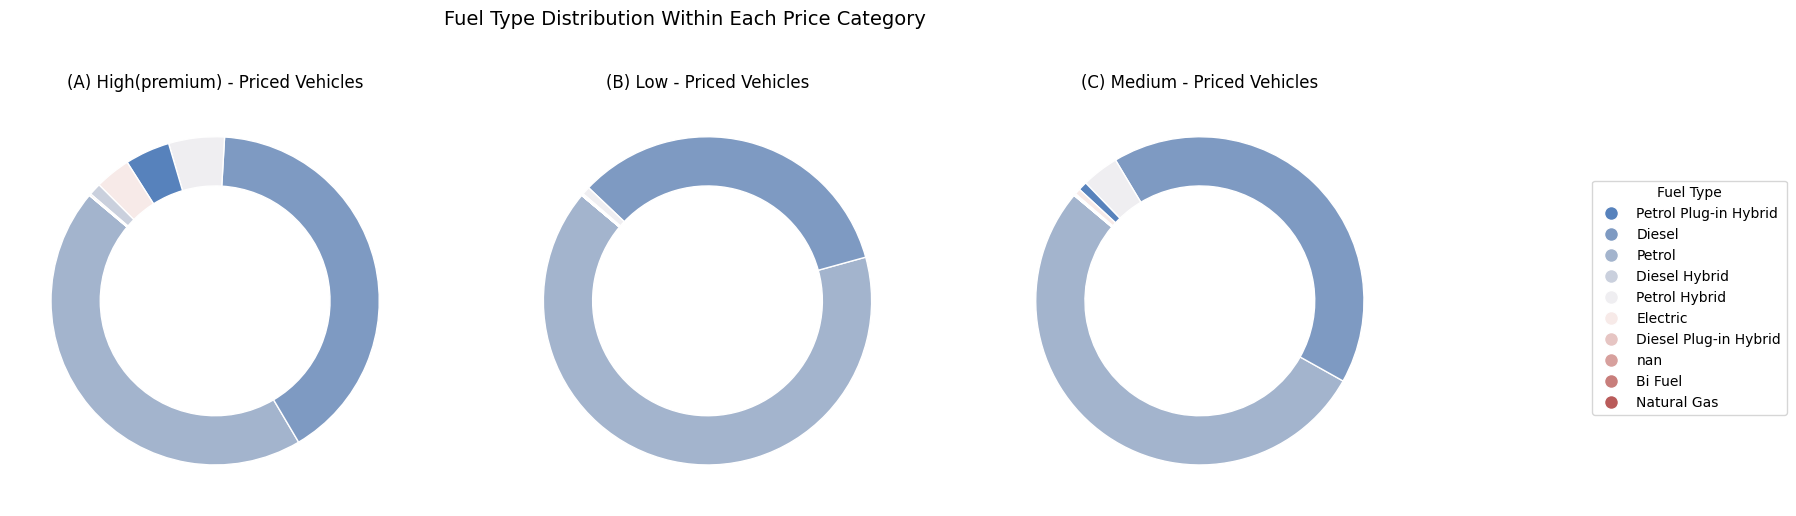

In [ ]:
# Data Visualisation purposes
price_categories = df['price_category'].unique()

fig, axes = plt.subplots(1, len(price_categories), figsize=(6 * len(price_categories), 6))
if len(price_categories) == 1:
    axes = [axes]

# 'vlag' color palette
fuel_types = df['fuel_type'].unique()
palette = sns.color_palette('vlag', n_colors=len(fuel_types))
color_map = dict(zip(fuel_types, palette))

# subplot titles
subplot_labels = ['A', 'B', 'C']

for ax, category, label in zip(axes, price_categories, subplot_labels):
    # Get fuel_type distribution for the current price category
    category_data = df[df['price_category'] == category]['fuel_type'].value_counts()

    # Map colors based on fuel_type
    colors = [color_map[fuel] for fuel in category_data.index]

    # Plot the donut chart
    wedges, _ = ax.pie(
        category_data,
        labels=None,   # No text on segments
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=colors
    )

    ax.set_title(f'({label}) {category} - Priced Vehicles', fontsize=12)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[fuel], markersize=10)
           for fuel in fuel_types]
fig.legend(
    handles,
    fuel_types,
    title='Fuel Type',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.suptitle('Fuel Type Distribution Within Each Price Category\n\n', fontsize=14)
plt.show()

# <font face="Arial" size=5 color='#8496b3'> 2. Data Processing for Machine Learning
<font face="Arial" size=3 color='#8496b3'> <font>

# <font face="Arial" size=4 color='#8496b3'> 2.1. Dealing with Missing Values, Outliers, and Noise (2-3)
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
""""
reg_code and year_of_registration
"""""

df.loc[(df['year_of_registration'].isnull()) & (df['reg_code'].isnull()) & (df['vehicle_condition']=='NEW')] = df.loc[(df['year_of_registration'].isnull()) & (df['reg_code'].isnull()) & (df['vehicle_condition']=='NEW'), :].fillna({'year_of_registration':(df["year_of_registration"].max())+1})

import random

# Mapping dictionary
year_to_reg_codes = {
    1963.0: ['A'], 1964.0: ['B'], 1965.0: ['C'], 1966.0: ['D'], 1967.0: ['E', 'F'],
    1968.0: ['G'], 1969.0: ['H'], 1970.0: ['J'], 1971.0: ['K'], 1972.0: ['L'],
    1973.0: ['M'], 1974.0: ['N'], 1975.0: ['P'], 1976.0: ['R'], 1977.0: ['S'],
    1978.0: ['T'], 1979.0: ['V'], 1980.0: ['W'], 1981.0: ['X'], 1982.0: ['Y'],
    1983.0: ['A'], 1984.0: ['B'], 1985.0: ['C'], 1986.0: ['D'], 1987.0: ['E'],
    1988.0: ['F'], 1989.0: ['G'], 1990.0: ['H'], 1991.0: ['J'], 1992.0: ['K'],
    1993.0: ['L'], 1994.0: ['M'], 1995.0: ['N'], 1996.0: ['P'], 1997.0: ['R'],
    1998.0: ['S'], 1999.0: ['T', 'V'], 2000.0: ['V', 'X'],
    2001.0: ['Y', '51'], 2002.0: ['2', '52'], 2003.0: ['3', '53'], 2004.0: ['4', '54'],
    2005.0: ['5', '55'], 2006.0: ['6', '56'], 2007.0: ['7', '57'], 2008.0: ['8', '58'],
    2009.0: ['9', '59'], 2010.0: ['10', '60'], 2011.0: ['11', '61'], 2012.0: ['12', '62'],
    2013.0: ['13', '63'], 2014.0: ['14', '64'], 2015.0: ['15', '65'], 2016.0: ['16', '66'],
    2017.0: ['17', '67'], 2018.0: ['18', '68'], 2019.0: ['19', '69'], 2020.0: ['20', '70'], 2021.0: ['21', '71']
}

# Reverse mapping for reg_code -> years
reg_code_to_year = {code: year for year, codes in year_to_reg_codes.items() for code in codes}

# Function to correct the values
def correct_values(row):
    year = row['year_of_registration']
    reg_code = row['reg_code']
    mileage = row['mileage']

    # Step 1: Use year_of_registration to guess reg_code
    if pd.notnull(year) and year in year_to_reg_codes:
        guessed_reg_code = random.choice(year_to_reg_codes[year])  # Pick a valid reg_code for the year
        return year, guessed_reg_code

    # Step 2: Use reg_code to guess year_of_registration
    if pd.notnull(reg_code) and reg_code in reg_code_to_year:
        guessed_year = reg_code_to_year[reg_code]
        return guessed_year, reg_code

    return year, reg_code

# Applying the function to correct the values
df[['year_of_registration', 'reg_code']] = df.apply(lambda row: pd.Series(correct_values(row)), axis=1)

df.drop(df.loc[df["year_of_registration"]<1963].index, inplace=True)

# Defining the transformation function based on grouping

def fill_missing_year(grouped_df, df):

    return grouped_df['year_of_registration'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['year_of_registration'].mode()[0])
    )

# Apply the group-based imputation function
df['year_of_registration'] = fill_missing_year(
    df.groupby(['standard_make', 'standard_model']),df
)

# Apply the function to correct the values
df[['year_of_registration', 'reg_code']] = df.apply(lambda row: pd.Series(correct_values(row)), axis=1)


""""
fuel_type
"""""

# Calculate the global mode of fuel_type for fallback
global_mode_fuel_type = df['fuel_type'].mode()[0]
# which is Petrol

df['fuel_type'] = df.groupby(['standard_make', 'standard_model'])['fuel_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_fuel_type)
)


""""
mileage
"""""
# Group by 'standard_make', 'standard_model', and 'fuel_type'
def process_mileage(group):
    # Fill Missing Values with Group Median
    median = group['mileage'].median()
    group['mileage'] = group['mileage'].fillna(median)

    # Capping Outliers by Using IQR
    Q1 = group['mileage'].quantile(0.25)
    Q3 = group['mileage'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above the upper bound
    group['mileage'] = group['mileage'].apply(lambda x: min(x, upper_bound))

    return group

# Apply the function to each group
df = df.groupby(['standard_make', 'standard_model', 'fuel_type']).apply(process_mileage).reset_index(drop=True)

""""
standard_colour
"""""

# Global mode for fallback
global_mode_colour = df['standard_colour'].mode()[0]
# which is Black

# Fill missing 'standard_colour' based on mode within groups
df['standard_colour'] = df.groupby(['standard_make', 'standard_model'])['standard_colour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_colour)
)

""""
body_type
"""""

# Calculate the global mode of fuel_type for fallback
global_mode_body_type = df['body_type'].mode()[0]
# which is Hatchback

df['body_type'] = df.groupby(['standard_make', 'standard_model'])['body_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_body_type)
)

bin_edges = df['price'].quantile([0, 0.25, 0.75, 1]).values
# Create a summary of bin edges
price_bin_bounds = {
    'Low': (bin_edges[0], bin_edges[1]),
    'Medium': (bin_edges[1], bin_edges[2]),
    'High': (bin_edges[2], bin_edges[3])
}
print(price_bin_bounds)

from scipy.stats import chi2_contingency

# Apply quartile-based price categories
df['price_category'] = pd.cut(
    df['price'],
    bins=[df['price'].min(), df['price'].quantile(0.25), df['price'].quantile(0.75), df['price'].max()],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)


<ipython-input-19-a51e8042e4fb>:103: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['standard_make', 'standard_model', 'fuel_type']).apply(process_mileage).reset_index(drop=True)


{'Low': (120.0, 7495.0), 'Medium': (7495.0, 20000.0), 'High': (20000.0, 9999999.0)}


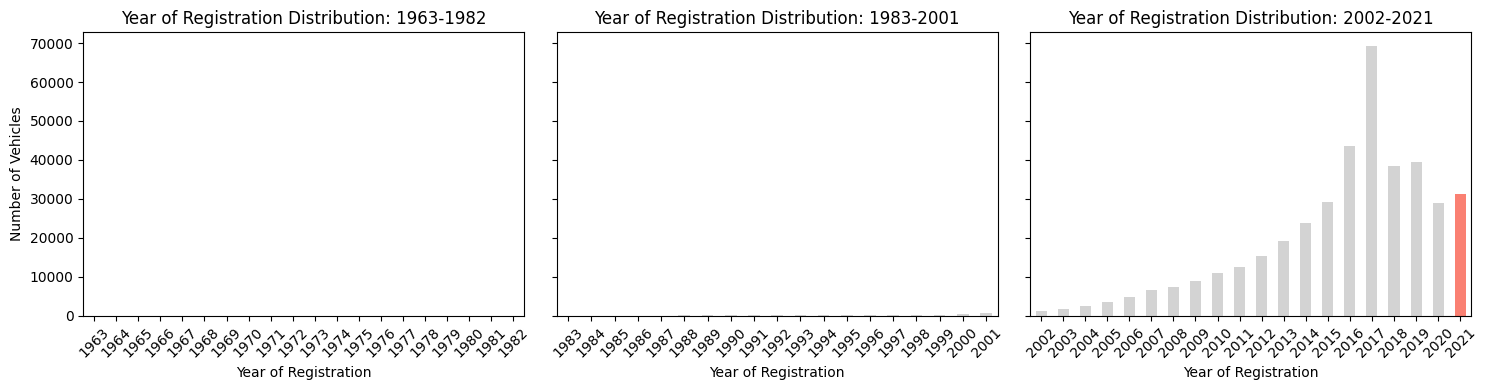

In [ ]:
# Ensure numeric year_of_registration for filtering and plotting
df['year_of_registration'] = pd.to_numeric(df['year_of_registration'], errors='coerce')

# Prepare data subsets for year_of_registration distribution in each time frame
year_distribution_data = {}
time_frames = {
    "1963-1982": (1963, 1982),
    "1983-2001": (1983, 2001),
    "2002-2021": (2002, 2021),
}

for frame, (start, end) in time_frames.items():
    subset = df[(df['year_of_registration'] >= start) & (df['year_of_registration'] <= end)]
    year_distribution_data[frame] = subset['year_of_registration'].value_counts().sort_index()

# Create a single row with 3 subplots for year_of_registration distribution and highlight 2021
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, (frame, year_distribution) in zip(axes, year_distribution_data.items()):
    # Default all bars to light grey
    colors = ['lightgrey'] * len(year_distribution)

    # Highlight the bar for the year 2021 if it exists in the current distribution
    if 2021 in year_distribution.index:
        colors[year_distribution.index.get_loc(2021)] = 'salmon'

    # Plot the bar chart
    year_distribution.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Year of Registration Distribution: {frame}")
    ax.set_xlabel("Year of Registration")
    ax.set_ylabel("Number of Vehicles")
    ax.set_xticks(range(len(year_distribution)))
    ax.set_xticklabels(year_distribution.index.astype(int), rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
(df["year_of_registration"]==2021).sum()

31277

In [ ]:
df.loc[df["year_of_registration"]<1963].shape

(0, 13)

# <font face="Arial" size=4 color='#8496b3'> 2.2. Feature Engineering, Data Transformation, Feature Selection (2-3)
<font face="Arial" size=3 color='#8496b3'> <font>

# <font face="Arial" size=3 color='#a9b5ca'> 2.2.1. Feature Engineering
<font>

In [ ]:
# in order to compare price with other categorical features (e.ge checking the association)
# the price numerical feature is modified to another column with 3 categories of
# low, medium, high(premium) with this logic:

# price category
bin_edges = df['price'].quantile([0, 0.25, 0.75, 1]).values

price_bin_bounds = {
    'Low': (bin_edges[0], bin_edges[1]),
    'Medium': (bin_edges[1], bin_edges[2]),
    'High': (bin_edges[2], bin_edges[3])
}

# upper and lower bands of each category
print(price_bin_bounds)

# create new feature "price_category"
df['price_category'] = pd.cut(
    df['price'],
    bins=[df['price'].min(), df['price'].quantile(0.25), df['price'].quantile(0.75), df['price'].max()],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

{'Low': (120.0, 7495.0), 'Medium': (7495.0, 20000.0), 'High': (20000.0, 9999999.0)}


In [ ]:
# df. drop(columns=['price_category'], inplace=True)

# <font face="Arial" size=3 color='#a9b5ca'> 2.2.2. Data Transformation
<font>

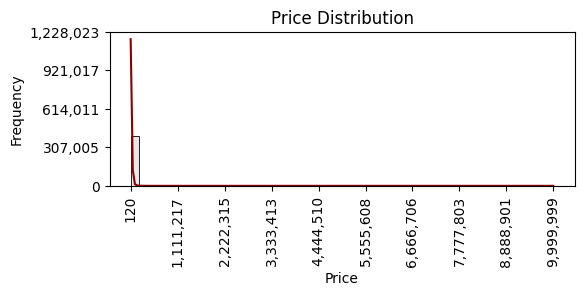

In [ ]:
# Apply log transformation to price
df['log_price'] = np.log1p(df['price'])

# price distribution before log transform

plt.figure(figsize=(6, 2))

# Plot the histogram with custom bins
ax= sns.histplot(df['price'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

plt.title('Price Distribution', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# x-ticks (Price)
xticks = np.linspace(df['price'].min(), df['price'].max(), num=10)  # 10 evenly spaced ticks
plt.xticks(xticks, labels=["{:,}".format(int(x)) for x in xticks], fontsize=10, rotation=90)

# y-ticks (Frequency)
y_max = ax.get_ylim()[1]
yticks = np.linspace(0, y_max, num=5)  # 5 evenly spaced ticks
ytick_labels = ["{:,}".format(int(y)) for y in yticks]
plt.yticks(yticks, labels=ytick_labels, fontsize=10)


plt.show()

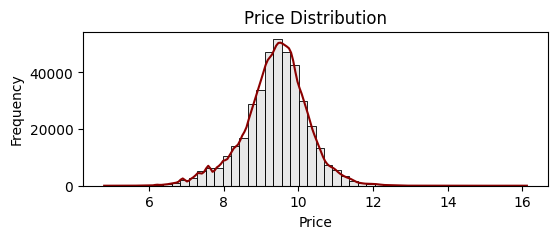

In [ ]:
# price distribution after log transform

plt.figure(figsize=(6, 2))

ax= sns.histplot(df['log_price'], bins=50, kde=True, color='lightgrey', stat='count')
ax.lines[0].set_color('darkred')

plt.title('Price Distribution', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# <font face="Arial" size=3 color='#a9b5ca'> 2.2.3. Feature Selection
<font>

In [ ]:
from scipy.stats import chi2_contingency

# categorical features for Chi-Square Test
categorical_features = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type']

# Chi-Square Test for each categorical feature
chi_square_results_quartiles = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['price_category'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi_square_results_quartiles[feature] = {'Chi2 Statistic': chi2, 'p-value': p}

chi_square_df_quartiles = pd.DataFrame.from_dict(chi_square_results_quartiles, orient='index')
display(chi_square_df_quartiles)

,Chi2 Statistic,p-value
standard_colour,15373.486452,0.000000e+00
standard_make,109029.141594,0.000000e+00
standard_model,272198.169999,0.000000e+00
vehicle_condition,43173.888094,0.000000e+00
body_type,67203.945993,0.000000e+00
crossover_car_and_van,585.865613,6.038075e-128
fuel_type,25474.799895,0.000000e+00


In [ ]:
# Calculate Spearman Correlation with price
spearman_corr= df[['mileage', 'year_of_registration', 'price']].corr(method='spearman')

display(spearman_corr)

,mileage,year_of_registration,price
mileage,1.000000,-0.861406,-0.645275
year_of_registration,-0.861406,1.000000,0.704944
price,-0.645275,0.704944,1.000000


In [ ]:
# since the H0 is assuming there's no association
# based on the chi2 scores standard_model > standard_make > body_type have more importantance for us

# <font face="Arial" size=3 color='#9f647a'> Result of section 1.3.2. Apply Binning method on Price for Data Exploration and Visualisation
<font>

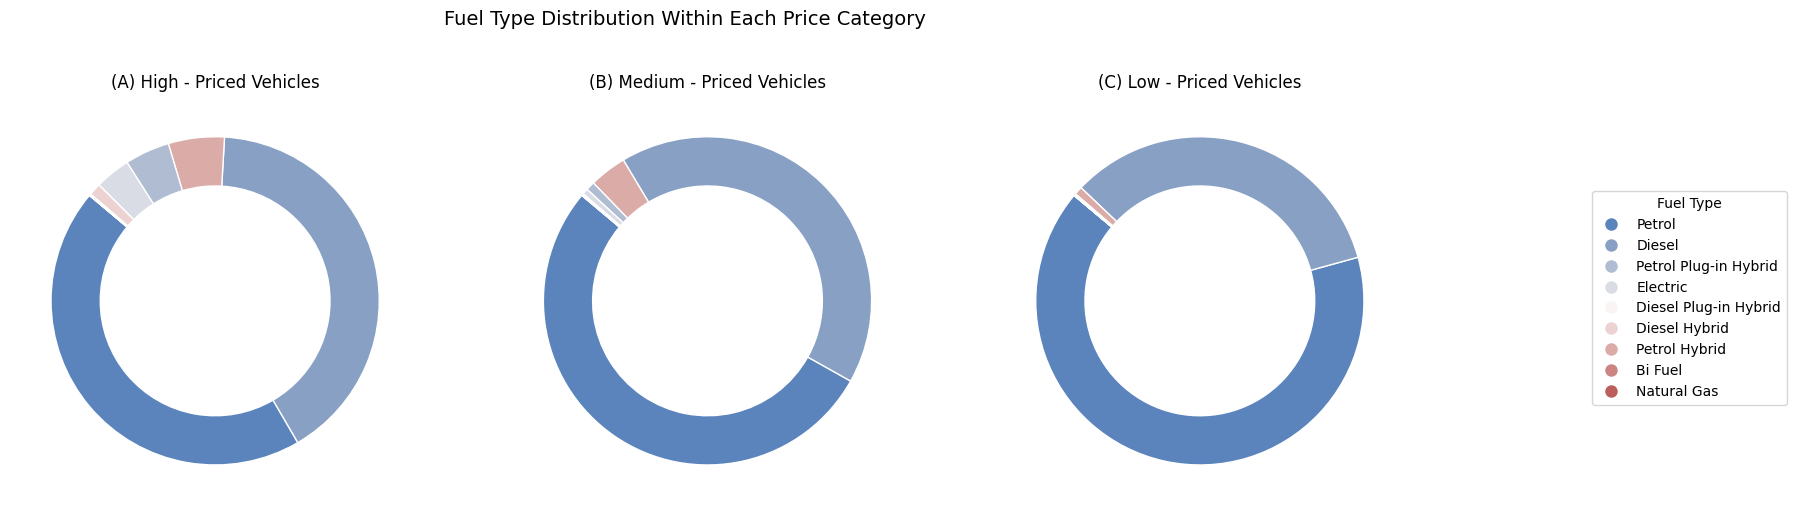

In [ ]:
price_categories = df['price_category'].unique()

fig, axes = plt.subplots(1, len(price_categories), figsize=(6 * len(price_categories), 6))
if len(price_categories) == 1:
    axes = [axes]

# 'vlag' color palette
fuel_types = df['fuel_type'].unique()
palette = sns.color_palette('vlag', n_colors=len(fuel_types))
color_map = dict(zip(fuel_types, palette))

# subplot titles
subplot_labels = ['A', 'B', 'C']

for ax, category, label in zip(axes, price_categories, subplot_labels):
    # Get fuel_type distribution for the current price category
    category_data = df[df['price_category'] == category]['fuel_type'].value_counts()

    # Map colors based on fuel_type
    colors = [color_map[fuel] for fuel in category_data.index]

    # Plot the donut chart
    wedges, _ = ax.pie(
        category_data,
        labels=None,   # No text on segments
        startangle=140,
        wedgeprops=dict(width=0.3, edgecolor='w'),
        colors=colors
    )

    ax.set_title(f'({label}) {category} - Priced Vehicles', fontsize=12)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[fuel], markersize=10)
           for fuel in fuel_types]
fig.legend(
    handles,
    fuel_types,
    title='Fuel Type',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.suptitle('Fuel Type Distribution Within Each Price Category\n\n', fontsize=14)
plt.show()

# <font face="Arial" size=5 color='#8496b3'> 3. Model Building and 4. Model Evaluation and Analysis
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
import time

# <font face="Arial" size=3 color='#8496b3'> Before log transformation
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
results = []

In [ ]:
df1 = df.copy()

In [ ]:
df1.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type', 'price_category', 'log_price'],
      dtype='object')

In [ ]:
# Assign 1 to 'NEW' vehicles and 0 to 'USED' vehicles in the 'vehicle_condition' column
df1['vehicle_condition_NEW'] = df1['vehicle_condition'].apply(lambda x: 0 if x == 'USED' else 1)

# Apply One-Hot Encoding using earlier approach (only for 'crossover_car_and_van')
oneHot_encoded_features = ['crossover_car_and_van']  # Only include the remaining feature for OneHotEncoding
oneHot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding for the remaining feature
X_oneHot = oneHot_encoder.fit_transform(df1[oneHot_encoded_features])

# Convert one-hot encoded features into DataFrames
X_oneHot_df = pd.DataFrame(X_oneHot, columns=oneHot_encoder.get_feature_names_out(oneHot_encoded_features), index=df1.index)

# Concatenate the one-hot encoded features back with the dataset
df1 = pd.concat([df1.drop(columns=oneHot_encoded_features), X_oneHot_df], axis=1)

In [ ]:
df1.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,price_category,log_price,vehicle_condition_NEW,crossover_car_and_van_True
0,202002297861368,500.0,17,White,AC,Cobra,USED,2017.0,129500,Convertible,Petrol,High,11.771444,0,0.0
1,201905178037632,700.0,67,White,AC,Cobra,USED,2017.0,94950,Convertible,Petrol,High,11.461116,0,0.0
2,201910243647117,700.0,67,Black,AC,Cobra,USED,2017.0,94950,Convertible,Petrol,High,11.461116,0,0.0
3,202008222794712,3000.0,11,Grey,AK,Cobra,USED,2011.0,44995,Convertible,Petrol,High,10.714329,0,0.0
4,202010064658381,9154.0,68,Grey,Abarth,124 Spider,USED,2018.0,18690,Convertible,Petrol,Medium,9.835797,0,0.0


In [ ]:
df1. drop(columns=['reg_code', 'public_reference','price_category','log_price','vehicle_condition' ], inplace=True)

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Split dataset into training and testing subsets
train_data, testfout_data = train_test_split(df1, test_size=0.2, random_state=42)

# Separate features and target
features_to_encode = ['standard_colour', 'fuel_type', 'standard_make', 'standard_model', 'body_type']
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']
X_test = test_data.drop(columns=['price'])
y_test = test_data['price']

# Initialize the TargetEncoder
target_encoder = TargetEncoder(cols=features_to_encode, smoothing=1.0)

# Fit the encoder on the training data and transform
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Transform the test data using the fitted encoder
X_test_encoded = target_encoder.transform(X_test)


In [ ]:
X_train_encoded.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,crossover_car_and_van_True
191455,26417.0,13518.217688,21611.842308,17617.966961,2016.0,10459.804689,16743.822908,0,0.0
177178,18463.0,16951.824281,12333.533055,11540.309562,2015.0,10459.804689,16743.822908,0,0.0
29124,22000.0,19084.004624,20400.199449,21523.735141,2018.0,22516.111339,16743.822908,0,0.0
160981,22548.0,20230.132604,35789.972801,42971.510493,2018.0,22516.111339,16562.230342,0,0.0
127539,2500.0,19084.004624,26486.368708,32851.540933,2020.0,22516.111339,16562.230342,0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['mileage', 'year_of_registration', 'standard_colour',
                   'fuel_type', 'standard_make', 'standard_model',
                   'body_type']

X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

scaler = StandardScaler()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train_scaled[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test_scaled[numeric_columns])

In [ ]:
X_train_scaled.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,crossover_car_and_van_True
191455,-0.322157,-1.702118,0.271031,0.050597,0.107189,-0.926152,-0.189016,0,0.0
177178,-0.558058,-0.184732,-0.314779,-0.356388,-0.117762,-0.926152,-0.189016,0,0.0
29124,-0.453157,0.757525,0.194530,0.312144,0.557089,0.689739,-0.189016,0,0.0
160981,-0.436904,1.264024,1.166203,1.748379,0.557089,0.689739,-0.243843,0,0.0
127539,-1.031490,0.757525,0.578796,1.070702,1.006990,0.689739,-0.243843,0,0.0


Decision Tree

In [ ]:
# Define hyperparameters for GridSearch
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

start_time = time.time()

# Perform GridSearchCV
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=dt_param_grid, cv=5, n_jobs=-1)
dt_grid.fit(X_train_encoded, y_train)

dt_training_time = time.time() - start_time

print("Decision Tree Best Parameters:", dt_grid.best_params_)

# Evaluate on test set
y_pred_dt = dt_grid.best_estimator_.predict(X_test_encoded)

print("Decision Tree Test MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Test Root of MSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree Test R²:", r2_score(y_test, y_pred_dt))

Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Test MSE: 253026799.93039826
Decision Tree Test Root of MSE: 15906.81614687233
Decision Tree Test R²: 0.5484969490046037


In [ ]:
results.append({"Model": "Decision Tree Before",
                "MSE": mean_squared_error(y_test, y_pred_dt),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
                "R²": r2_score(y_test, y_pred_dt),
                "Time Consumption": dt_training_time})

Linear Regression

In [ ]:
# Train Linear Regression
lr = LinearRegression()

start_time = time.time()

# Cross-validation for R² scoring
cv_r2_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, n_jobs=-1)
cv_mse_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, n_jobs=-1)

# Fit Linear Regression on the entire training set
lr.fit(X_train_scaled, y_train)

lr_training_time = time.time() - start_time

# Evaluate on test set
y_pred_lr = lr.predict(X_test_scaled)

# Print results
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression Test Root of MSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression Test R²:", r2_score(y_test, y_pred_lr))

Linear Regression Test MSE: 284344711.67983335
Linear Regression Test Root of MSE: 16862.52388226132
Linear Regression Test R²: 0.49261301611858477


In [ ]:
results.append({"Model": "Linear Regression Before",
                "MSE": mean_squared_error(y_test, y_pred_lr),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
                "R²": r2_score(y_test, y_pred_lr),
                "Time Consumption": lr_training_time})

KNN

In [ ]:
# Define hyperparameters for GridSearch
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) or Euclidean (2) distance
}

start_time = time.time()

# Perform GridSearchCV
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

knn_training_time = time.time() - start_time

print("KNN Best Parameters:", knn_grid.best_params_)

# Evaluate on test set
y_pred_knn = knn_grid.best_estimator_.predict(X_test_scaled)

print("KNN Test MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN Test Root of MSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("KNN Test R²:", r2_score(y_test, y_pred_knn))

KNN Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
KNN Test MSE: 223236231.20617762
KNN Test Root of MSE: 14941.092035262269
KNN Test R²: 0.6016554787475936


In [ ]:
results.append({"Model": "KNN Before",
                "MSE": mean_squared_error(y_test, y_pred_knn),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn)),
                "R²": r2_score(y_test, y_pred_knn),
                "Time Consumption": knn_training_time})

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,MSE,RMSE,R²,Time Consumption
0,Decision Tree Before,2.530268e+08,15906.816147,0.548497,73.725345
1,Linear Regression Before,2.843447e+08,16862.523882,0.492613,1.759995
2,KNN Before,2.232362e+08,14941.092035,0.601655,598.631567


# <font face="Arial" size=3 color='#8496b3'> After log transformation
<font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
results2 = []

In [ ]:
df2 = df.copy()

In [ ]:
df2. drop(columns=['public_reference', 'reg_code', 'price_category', 'log_price'], inplace=True)

In [ ]:
df2.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [ ]:
# Assign 1 to 'NEW' vehicles and 0 to 'USED' vehicles in the 'vehicle_condition' column
df2['vehicle_condition_NEW'] = df2['vehicle_condition'].apply(lambda x: 0 if x == 'USED' else 1)

# Apply One-Hot Encoding using earlier approach (only for 'crossover_car_and_van')
oneHot_encoded_features = ['crossover_car_and_van']  # Only include the remaining feature for OneHotEncoding
oneHot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding for the remaining feature
X_oneHot = oneHot_encoder.fit_transform(df2[oneHot_encoded_features])

# Convert one-hot encoded features into DataFrames
X_oneHot_df = pd.DataFrame(X_oneHot, columns=oneHot_encoder.get_feature_names_out(oneHot_encoded_features), index=df2.index)

# Concatenate the one-hot encoded features back with the dataset
df2 = pd.concat([df2.drop(columns=oneHot_encoded_features), X_oneHot_df], axis=1)


In [ ]:
df2.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type,vehicle_condition_NEW,crossover_car_and_van_True
0,500.0,White,AC,Cobra,USED,2017.0,129500,Convertible,Petrol,0,0.0
1,700.0,White,AC,Cobra,USED,2017.0,94950,Convertible,Petrol,0,0.0
2,700.0,Black,AC,Cobra,USED,2017.0,94950,Convertible,Petrol,0,0.0
3,3000.0,Grey,AK,Cobra,USED,2011.0,44995,Convertible,Petrol,0,0.0
4,9154.0,Grey,Abarth,124 Spider,USED,2018.0,18690,Convertible,Petrol,0,0.0


In [ ]:
# Apply log transformation to mileage and price
df2['log_mileage'] = np.log1p(df2['mileage'])  # log-transform the numerical mileage feature
df2['log_price'] = np.log1p(df2['price'])      # log-transform the target

In [ ]:
df2. drop(columns=['vehicle_condition', 'price', 'mileage'], inplace=True)

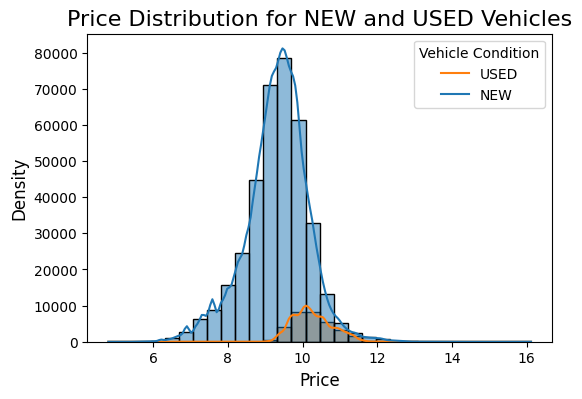

In [ ]:
# Plot the distribution of prices for "NEW" and "USED" vehicles
plt.figure(figsize=(6, 4))
sns.histplot(data=df2, x='log_price', hue='vehicle_condition_NEW', kde=True, bins=30)

# Set titles and labels
plt.title('Price Distribution for NEW and USED Vehicles', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Vehicle Condition', labels=['USED', 'NEW'], fontsize=10)
plt.show()

In [ ]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Split dataset into training and testing subsets
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=42)

# Separate features and target
features_to_encode = ['standard_colour', 'fuel_type', 'standard_make', 'standard_model', 'body_type']
X_train = train_data.drop(columns=['log_price'])
y_train = train_data['log_price']
X_test = test_data.drop(columns=['log_price'])
y_test = test_data['log_price']

# Initialize the TargetEncoder
target_encoder = TargetEncoder(cols=features_to_encode, smoothing=1.0)

# Fit the encoder on the training data and transform
X_train_encoded = target_encoder.fit_transform(X_train, y_train)

# Transform the test data using the fitted encoder
X_test_encoded = target_encoder.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['log_mileage', 'year_of_registration', 'standard_colour',
                   'fuel_type', 'standard_make', 'standard_model',
                   'body_type']

X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

scaler = StandardScaler()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train_scaled[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test_scaled[numeric_columns])

In [ ]:
X_train_scaled.head()

,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,vehicle_condition_NEW,crossover_car_and_van_True,log_mileage
191455,-1.959235,0.803188,0.464127,0.107189,-1.042857,-0.604415,0,0.0,0.296850
177178,-0.224759,-0.341710,-0.361163,-0.117762,-1.042857,-0.604415,0,0.0,0.170576
29124,0.507985,0.672834,0.826278,0.557089,1.136025,-0.604415,0,0.0,0.232357
160981,1.140634,1.908965,1.690201,0.557089,1.136025,0.307752,0,0.0,0.241030
127539,0.507985,1.146206,1.567369,1.006990,1.136025,0.307752,0,0.0,-0.534116


Decision Tree

In [ ]:
# Define hyperparameters for GridSearch
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

start_time = time.time()

# Perform GridSearchCV
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=dt_param_grid, cv=5, n_jobs=-1)
dt_grid.fit(X_train_encoded, y_train)

dt_training_time = time.time() - start_time

print("Decision Tree Best Parameters:", dt_grid.best_params_)


# Evaluate on test set
y_pred_dt = dt_grid.best_estimator_.predict(X_test_encoded)

print("Decision Tree Test MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Test Root of MSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree Test R²:", r2_score(y_test, y_pred_dt))

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Test MSE: 0.06370036119840566
Decision Tree Test Root of MSE: 0.2523893048415595
Decision Tree Test R²: 0.9129809946202815


In [ ]:
results2.append({"Model": "Decision Tree After",
                "MSE": mean_squared_error(y_test, y_pred_dt),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
                "R²": r2_score(y_test, y_pred_dt),
                "Time Consumption": dt_training_time
                })

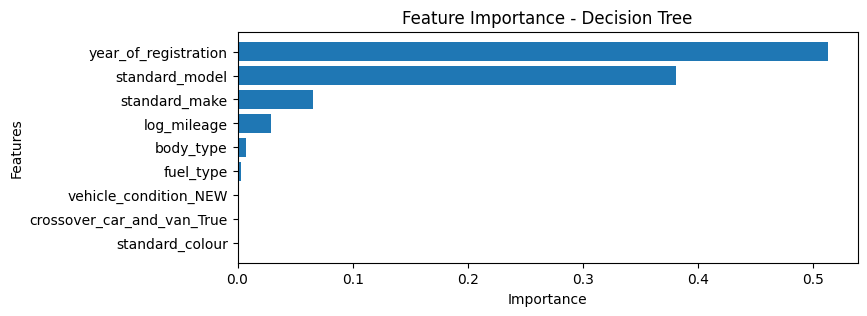

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = dt_grid.best_estimator_.feature_importances_
features = X_train_encoded.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(8, 3))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

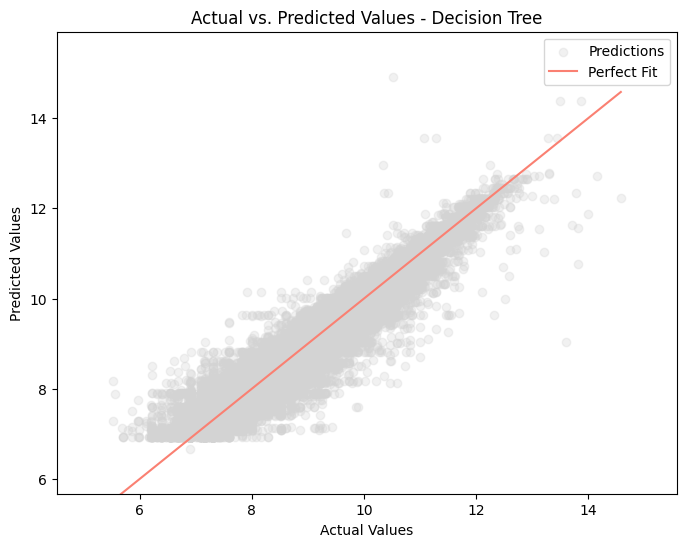

In [ ]:
# Calculate residuals
residuals_dt = y_test - y_pred_dt

error_analysis_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_dt,
    "Residual": residuals_dt,
    "Abs_Residual": np.abs(residuals_dt)
})

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.3, label="Predictions", color='lightgrey')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="salmon", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Decision Tree")
plt.legend()
plt.xlim([y_test.min() - 1, y_test.max() + 1])  # Extend x-axis range
plt.ylim([y_pred_dt.min() - 1, y_pred_dt.max() + 1])  # Extend y-axis range
plt.show()

Linear Regression

In [ ]:
# Train Linear Regression
lr = LinearRegression()

start_time = time.time()

# Cross-validation for R² scoring
cv_r2_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, n_jobs=-1)
cv_mse_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, n_jobs=-1)

# Fit Linear Regression on the entire training set
lr.fit(X_train_scaled, y_train)

lr_training_time = time.time() - start_time

# Evaluate on test set
y_pred_lr = lr.predict(X_test_scaled)

# Print results
print("Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression Test Root of MSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression Test R²:", r2_score(y_test, y_pred_lr))

Linear Regression Test MSE: 0.1368155708947882
Linear Regression Test Root of MSE: 0.36988588901820546
Linear Regression Test R²: 0.8131006688856763


In [ ]:
results2.append({"Model": "Linear Regression After",
                "MSE": mean_squared_error(y_test, y_pred_lr),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
                "R²": r2_score(y_test, y_pred_lr),
                "Time Consumption": lr_training_time
                })

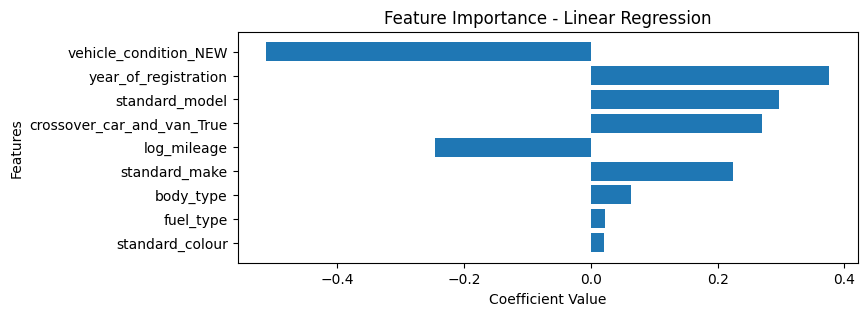

In [ ]:
# Retrieve coefficients and corresponding features
coefficients = lr.coef_
features = X_train_scaled.columns

# Create a DataFrame for visualization
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df['Absolute_Coefficient'] = coeff_df['Coefficient'].abs()  # To rank by magnitude
coeff_df.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

# Plot coefficients
plt.figure(figsize=(8, 3))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# “The seemingly counterintuitive negative coefficient for "NEW"
# condition may reflect that newer vehicles command higher prices
# primarily through their year rather than condition status when
#  controlling for other factors.
# ”

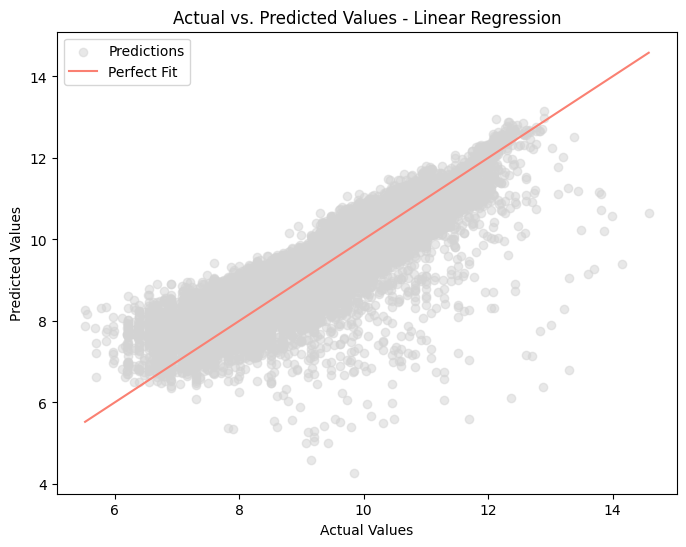

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Predictions", color="lightgrey")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="salmon", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Linear Regression")
plt.legend()
plt.show()


KNN

In [ ]:
# Define hyperparameters for GridSearch
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) or Euclidean (2) distance
}

start_time = time.time()

# Perform GridSearchCV
knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

knn_training_time = time.time() - start_time

print("KNN Best Parameters:", knn_grid.best_params_)

# Evaluate on test set
y_pred_knn = knn_grid.best_estimator_.predict(X_test_scaled)

print("KNN Test MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN Test Root of MSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))
print("KNN Test R²:", r2_score(y_test, y_pred_knn))

KNN Best Parameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
KNN Test MSE: 0.04686496255193175
KNN Test Root of MSE: 0.2164831692116774
KNN Test R²: 0.935979288787315


In [ ]:
results2.append({"Model": "KNN After",
                "MSE": mean_squared_error(y_test, y_pred_knn),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn)),
                "R²": r2_score(y_test, y_pred_knn),
                "Time Consumption": knn_training_time
                })

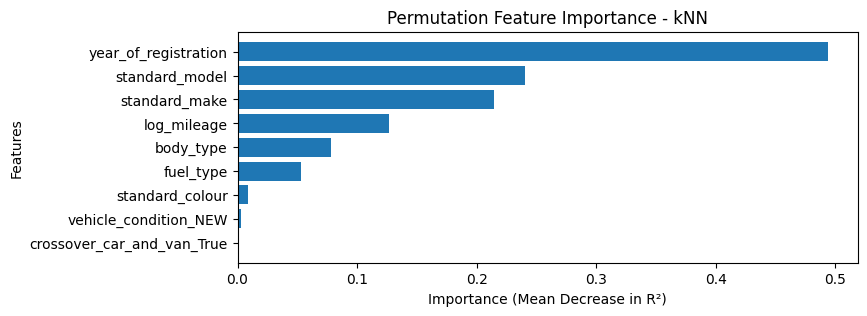

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(knn_grid.best_estimator_, X_test_scaled, y_test, scoring='r2', n_repeats=10, random_state=42)

# Create a DataFrame for visualization
perm_df = pd.DataFrame({'Feature': X_test_scaled.columns, 'Importance': perm_importance.importances_mean})
perm_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot permutation importance
plt.figure(figsize=(8, 3))
plt.barh(perm_df['Feature'], perm_df['Importance'])
plt.title('Permutation Feature Importance - kNN')
plt.xlabel('Importance (Mean Decrease in R²)')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
results_df2 = pd.DataFrame(results2)
results_df2

,Model,MSE,RMSE,R²,Time Consumption
0,Decision Tree After,0.063700,0.252389,0.912981,68.692192
1,Linear Regression After,0.136816,0.369886,0.813101,1.935819
2,KNN After,0.046865,0.216483,0.935979,433.943983


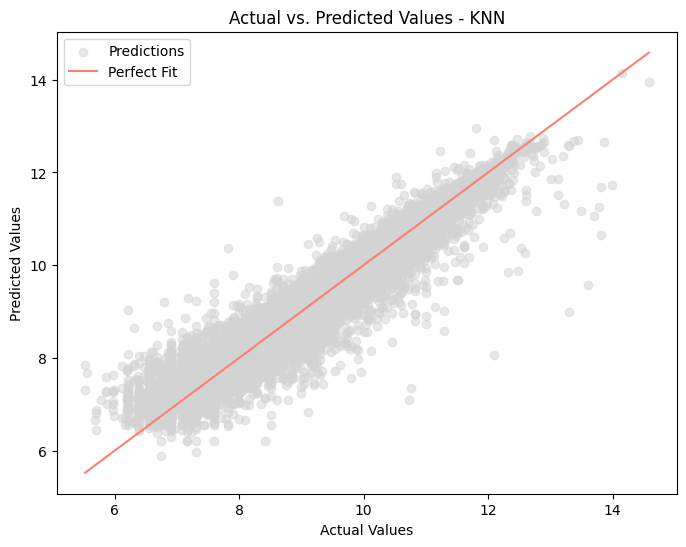

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, label="Predictions", color="lightgrey")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="salmon", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - KNN")
plt.legend()
plt.show()

# <font face="Arial" size=4 color='#8496b3'> 4.3. Fine-Grained Evaluation (2-4)
<font face="Arial" size=4 color='#8496b3'>
(e.g., with instance-level errors)
<font><font>

<font face="Arial" size=3 color='#a9b5ca'> 4.3.1. Visualising the Residuals Scatter Plot
<font>

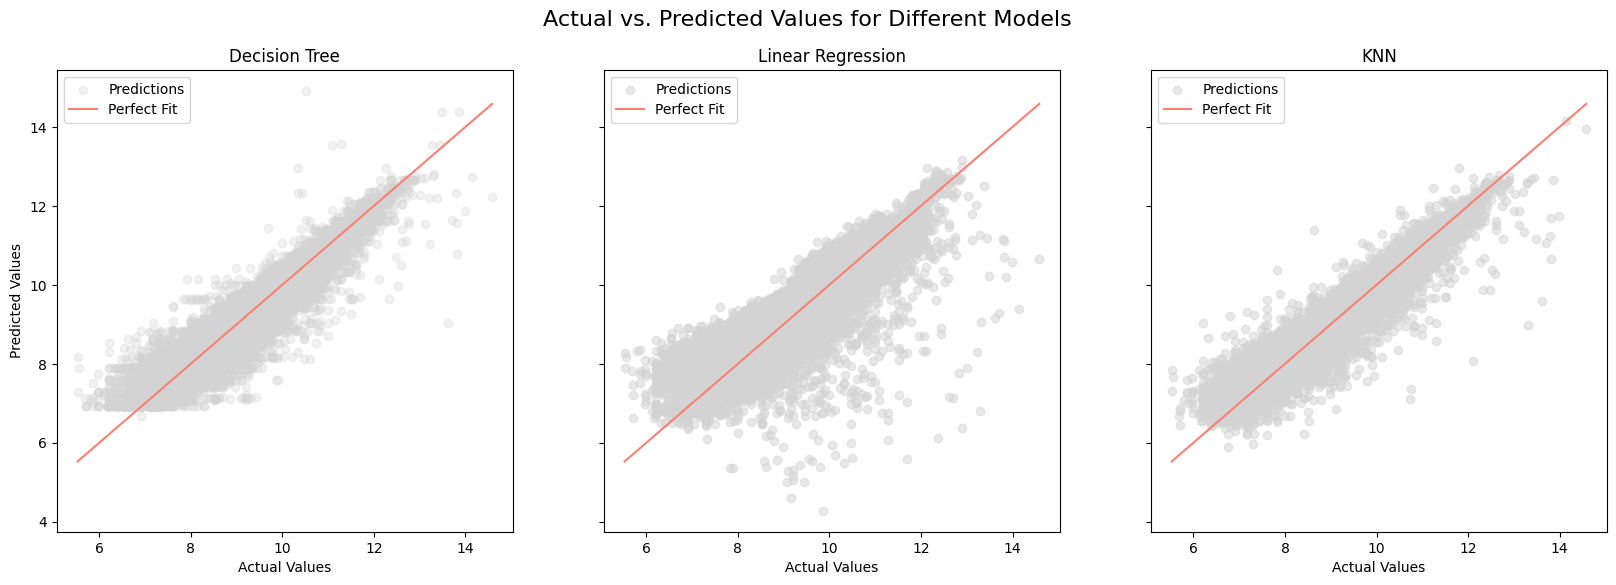

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

# Decision Tree Plot
axes[0].scatter(y_test, y_pred_dt, alpha=0.3, label="Predictions", color='lightgrey')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="salmon", label="Perfect Fit")
axes[0].set_title("Decision Tree")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].legend()

# Linear Regression Plot
axes[1].scatter(y_test, y_pred_lr, alpha=0.5, label="Predictions", color="lightgrey")
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="salmon", label="Perfect Fit")
axes[1].set_title("Linear Regression")
axes[1].set_xlabel("Actual Values")
axes[1].legend()

# KNN Plot
axes[2].scatter(y_test, y_pred_knn, alpha=0.5, label="Predictions", color="lightgrey")
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="salmon", label="Perfect Fit")
axes[2].set_title("KNN")
axes[2].set_xlabel("Actual Values")
axes[2].legend()

# Adjust layout and display the plots
fig.suptitle("Actual vs. Predicted Values for Different Models", fontsize=16)
plt.show()


<font face="Arial" size=3 color='#a9b5ca'> 4.3.2. Residual Analysis
<font>

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_dt

# Add residuals to a DataFrame for detailed analysis
error_analysis_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_dt,
    "Residual": residuals,
    "Abs_Residual": np.abs(residuals)
})

# Sort by absolute residuals (largest errors)
high_error_instances = error_analysis_df.sort_values(by="Abs_Residual", ascending=False).head(5)
high_error_instances

,Actual,Predicted,Residual,Abs_Residual
77282,13.610945,9.030626,4.580319,4.580319
221385,10.518565,14.916367,-4.397801,4.397801
215744,13.815511,10.769847,3.045664,3.045664
217462,12.323838,9.638644,2.685194,2.685194
24312,5.525453,8.162458,-2.637005,2.637005


In [ ]:
# Calculate residuals
residuals = y_test - y_pred_lr

# Add residuals to a DataFrame for detailed analysis
error_analysis_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_lr,
    "Residual": residuals,
    "Abs_Residual": np.abs(residuals)
})

# Sort by absolute residuals (largest errors)
high_error_instances = error_analysis_df.sort_values(by="Abs_Residual", ascending=False).head(5)
high_error_instances

,Actual,Predicted,Residual,Abs_Residual
2913,12.886644,6.378555,6.508089,6.508089
2918,13.296318,6.797640,6.498678,6.498678
273848,12.367345,6.121903,6.245442,6.245442
256495,11.695214,5.599314,6.095899,6.095899
94399,12.706821,7.128669,5.578152,5.578152


In [ ]:
# Calculate residuals
residuals = y_test - y_pred_knn

# Add residuals to a DataFrame for detailed analysis
error_analysis_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_knn,
    "Residual": residuals,
    "Abs_Residual": np.abs(residuals)
})

# Sort by absolute residuals (largest errors)
high_error_instances = error_analysis_df.sort_values(by="Abs_Residual", ascending=False).head(5)
high_error_instances

,Actual,Predicted,Residual,Abs_Residual
217464,13.304603,8.984884,4.319719,4.319719
75581,12.100662,8.067694,4.032968,4.032968
77282,13.610945,9.579876,4.031068,4.031068
114146,10.736310,7.098963,3.637347,3.637347
219238,10.757818,7.349409,3.408408,3.408408
